In [1]:
#@title import the data set

import pandas as pd

data = pd.read_csv("laptop_cleaned2.csv")
data.head()


,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,...,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,50399,4.30,AMD,AMD Ryzen 5,5600H,5.0,6.0,...,AMD Radeon RX 6500M,AMD,4.0,False,15.6,1920,1080,141.21,True,Windows 11 OS
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,Lenovo,26690,4.45,AMD,AMD Ryzen 3,7320U,7.0,4.0,...,AMD Radeon Graphics,AMD,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,HP,37012,4.65,Intel,Intel Core i3,1215U,12.0,6.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,Samsung,69990,4.75,Intel,Intel Core i5,1240P,12.0,12.0,...,Intel Iris Xe Graphics,Intel,NaN,False,13.3,1080,1920,165.63,False,Windows 11 OS
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno,23990,4.25,Intel,Intel Core i3,1115G4,11.0,2.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS


In [2]:
data.tail()

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,...,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
1015,1015,MSI Creator Z17 HX Studio A13V Laptop,MSI,247999,4.45,Intel,Intel Core i9,13900H,13.0,14.0,...,NVIDIA GeForce RTX 4070,NVIDIA,8.0,False,17.0,2560,1600,177.58,False,Windows 11 OS
1016,1016,MSI Stealth 16 Mercedes AMG Motorsport A13V Ga...,MSI,292990,4.20,Intel,Intel Core i9,13900H,13.0,14.0,...,NVIDIA GeForce RTX 4070,NVIDIA,8.0,False,16.0,3840,2400,283.02,False,Windows 11 OS
1017,1017,HP Victus 15-fb0131AX Gaming Laptop (AMD Ryzen...,HP,58800,4.40,AMD,AMD Ryzen 5,5600H,5.0,6.0,...,AMD Radeon RX 5600M,AMD,4.0,False,15.6,1920,1080,141.21,False,Windows 11 OS
1018,1018,Asus Vivobook 16 2023 M1605YA-MB521WS Laptop (...,Asus,54999,4.25,AMD,AMD Ryzen 5,7530U,7.0,6.0,...,AMD Radeon AMD,AMD,NaN,False,16.0,1920,1200,141.51,False,Windows 11 OS
1019,1019,Dell Inspiron 7630 IC7630GHHRH001ORS1 2 in 1 L...,Dell,94490,4.05,Intel,Intel Core i5,1335U,13.0,10.0,...,Intel Iris Xe Graphics,Intel,NaN,False,16.0,1920,1200,141.51,True,Windows 11 OS


In [3]:
#@title check the null values in the dataset

data.isnull().sum()

,0
Unnamed: 0,0
Name,0
Brand,0
Price,0
Rating,0
Processor_brand,0
Processor_name,0
Processor_variant,24
Processor_gen,129
Core_per_processor,12


In [4]:
#@title Calculate the percentage of null values spreaded in the dataset

missing_values= (data.isnull().sum()/len(data))*100


<Axes: title={'center': 'percentage of missing values'}, xlabel='features', ylabel='percentage'>

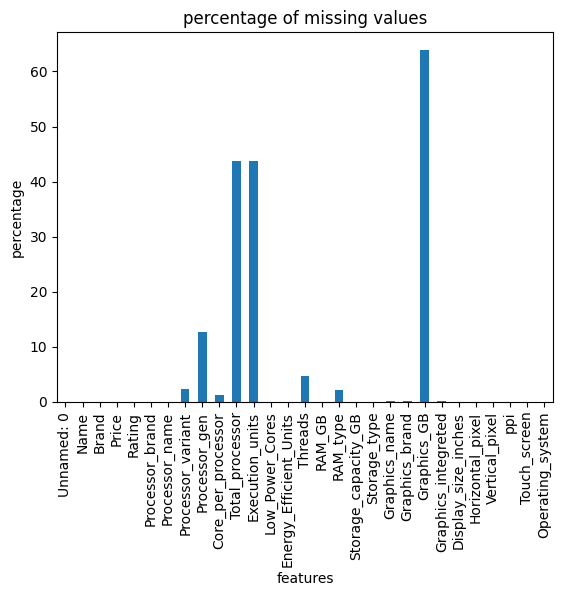

In [5]:
import seaborn as sns

missing_values.plot(kind='bar',title = "percentage of missing values",xlabel="features",ylabel="percentage")


In [6]:
#@title Perform data preprocessing

# divide the data set into two splits such as training and testing data

input_features = data[['Brand','Processor_brand','Processor_gen','RAM_GB','Storage_capacity_GB']]

output_features = data[['Name','Price']]

In [7]:
input_features.isnull().sum()

,0
Brand,0
Processor_brand,0
Processor_gen,129
RAM_GB,0
Storage_capacity_GB,0


In [8]:
input_features['Processor_gen']

,Processor_gen
0,5.0
1,7.0
2,12.0
3,12.0
4,11.0
...,...
1015,13.0
1016,13.0
1017,5.0
1018,7.0


In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

input_features['Processor_gen'] = imputer.fit_transform(input_features[['Processor_gen']])

<ipython-input-9-040fa42fad26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_features['Processor_gen'] = imputer.fit_transform(input_features[['Processor_gen']])


In [10]:
output_features.isnull().sum()


,0
Name,0
Price,0


In [11]:
#@title check the datatypes of a input features
input_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                1020 non-null   object 
 1   Processor_brand      1020 non-null   object 
 2   Processor_gen        1020 non-null   float64
 3   RAM_GB               1020 non-null   int64  
 4   Storage_capacity_GB  1020 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 40.0+ KB


In [12]:
input_features.tail()

,Brand,Processor_brand,Processor_gen,RAM_GB,Storage_capacity_GB
1015,MSI,Intel,13.0,32,1000
1016,MSI,Intel,13.0,32,1000
1017,HP,AMD,5.0,8,512
1018,Asus,AMD,7.0,8,512
1019,Dell,Intel,13.0,8,512


In [13]:
#@title implement Label -encoder to encode the features are represented in categorical data

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

input_features['Brand'] = encoder.fit_transform(input_features['Brand'])

<ipython-input-13-433349e9da6a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_features['Brand'] = encoder.fit_transform(input_features['Brand'])


In [14]:
input_features['Processor_brand'] = encoder.fit_transform(input_features['Processor_brand'])

<ipython-input-14-965631173548>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_features['Processor_brand'] = encoder.fit_transform(input_features['Processor_brand'])


In [15]:
input_features.head()

,Brand,Processor_brand,Processor_gen,RAM_GB,Storage_capacity_GB
0,11,0,5.0,8,512
1,17,0,7.0,8,512
2,11,3,12.0,8,512
3,23,3,12.0,16,512
4,24,3,11.0,8,512


In [16]:
#@title encoding for output features

output_features_encoded['Name'] = encoder.fit_transform(output_features['Name'])

<ipython-input-16-fcc90a1fc552>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_features['Name'] = encoder.fit_transform(output_features['Name'])


In [17]:
output_features.head()

,Name,Price
0,580,50399
1,837,26690
2,426,37012
3,992,69990
4,994,23990


In [18]:
X = input_features
y = output_features

In [19]:
#@title train test split function
from sklearn.model_selection import train_test_split


from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train a MultiOutput Regressor with RandomForest
regressor = MultiOutputRegressor(RandomForestRegressor(random_state=42))
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)


In [20]:
#@title calculate the performance of the model

from sklearn.metrics import r2_score

# Assuming y_test (true values) and y_pred (predicted values) are numpy arrays
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.8540542459321017


In [45]:

#@title let's make a predictions
brand = input("Enter the brand name: ")
processor_brand = str(input("Enter the processor brand: "))
processor_gen= float(input("Enter the processor gen: "))
ram = int(input("Enter the RAM size (GB): "))
storage = int(input("Enter the storage size (GB): "))


# Input data for prediction (user input)
input_data = [[brand, processor_brand,processor_gen, ram, storage,]]

# Making predictions
predictions = regressor.predict(input_data)


# Extract individual outputs (name and price)
predicted_name = int(predictions[0][0])  # Assuming first column is name
predicted_price = predictions[0][1]  # Assuming second column is price

if (predicted_name in output_features['Name'].values):
  predicted_name = encoder.inverse_transform([predicted_name])
  print(f"Predicted Laptop Name: {predicted_name}")
  print(f"Predicted Price: {predicted_price}")
else:

  print(" i didnt find the proper name of the laptop so i suggest the appropriate amount of the laptop instead !!",{predicted_price})




      # Output predictions
    #  print(f"Predicted Laptop Name: {predicted_name}")
    #  print(f"Predicted Price: {predicted_price}")

Enter the brand name: 11
Enter the processor brand: 0
Enter the processor gen: 5
Enter the RAM size (GB): 8
Enter the storage size (GB): 512
Predicted Laptop Name: ['HP Spectre x360 14-ef2035TU Laptop (13th Gen Core i7/ 32GB/ 1TB SSD/ Win11 Home)']
Predicted Price: 50434.6286796016


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [47]:
data.to_csv('laptop_price_recommendation_cleaned_dataset.csv', index=False)

In [48]:
from google.colab import files

# Download the file
files.download('laptop_price_recommendation_cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
input_features.to_csv('input_features.csv', index=False)
output_features.to_csv('output_features.csv', index=False)

files.download('input_features.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
files.download('output_features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>